Importing h20 module and initialising the cluster

### TODO Recording:

- Click on the H2O server URL and show that H2O flow is running there

In [1]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "15.0.2" 2021-01-19; Java(TM) SE Runtime Environment (build 15.0.2+7-27); Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from /Users/jananiravi/opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpui_ub10r
  JVM stdout: /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpui_ub10r/h2o_jananiravi_started_from_python.out
  JVM stderr: /var/folders/yd/1rlyjfk975d3bb98d7_nyt740000gn/T/tmpui_ub10r/h2o_jananiravi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_jananiravi_z0nui6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Cluster related info can be obtained this way too

In [2]:
h2o.cluster().show_status()

H2O_cluster_uptime:,3 mins 11 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_jananiravi_z0nui6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Importing data and displaying the top 10 rows.
https://www.kaggle.com/imakash3011/rental-bike-sharing?select=hour.csv

In [3]:
bike_sharing_data = h2o.import_file('datasets/bike_sharing_data.csv')

bike_sharing_data.head()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0,3,13,16
2,2011-01-01 00:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0,8,32,40
3,2011-01-01 00:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0,5,27,32
4,2011-01-01 00:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0,3,10,13
5,2011-01-01 00:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0,0,1,1
6,2011-01-01 00:00:00,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
7,2011-01-01 00:00:00,1,0,1,6,0,6,0,1,0.22,0.2727,0.8,0,2,0,2
8,2011-01-01 00:00:00,1,0,1,7,0,6,0,1,0.2,0.2576,0.86,0,1,2,3
9,2011-01-01 00:00:00,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0,1,7,8
10,2011-01-01 00:00:00,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0,8,6,14


Getting shape of dataframe

In [5]:
bike_sharing_data.shape

(17379, 17)

In [6]:
bike_sharing_data.describe()

Rows:17379
Cols:17

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
type,int,time,int,int,int,int,int,int,int,int,real,real,real,real,int,int,int
mins,1.0,1293840000000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.02,0.0,0.0,0.0,0.0,0.0,1.0
mean,8690.0,1325477314552.0461,2.501639910236492,0.5025605615973301,6.5377754761493785,11.546751826917548,0.028770355026181024,3.003682605443351,0.6827205247712756,1.425283387997008,0.4969871684216584,0.47577510213476026,0.6272288394038784,0.1900976063064618,35.67621842453536,153.78686920996606,189.4630876345014
maxs,17379.0,1356912000000.0,4.0,1.0,12.0,23.0,1.0,6.0,1.0,4.0,1.0,1.0,1.0,0.8507,367.0,886.0,977.0
sigma,5017.029499614288,18150225217.779854,1.1069181394480765,0.5000078290910197,3.438775713750168,6.914405095264493,0.16716527638437123,2.005771456110988,0.4654306335238829,0.6393568777542534,0.19255612124972193,0.17185021563535932,0.19292983406291514,0.1223402285727905,49.30503038705309,151.35728591258314,181.38759909186476
zeros,0,0,0,8645,0,726,16879,2502,5514,0,0,2,22,2180,1581,24,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,2011-01-01 00:00:00,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01 00:00:00,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,8.0,32.0,40.0
2,3.0,2011-01-01 00:00:00,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,5.0,27.0,32.0


In [7]:
bike_sharing_data.structure()

H2OFrame: 'bike_sharing_data.hex' 
Dimensions: 17379 obs. of 17 variables
$ instant    :  num 1 2 3 4 5 6 7 8 9 10
$ dteday     :  num 1293840000000 1293840000000 1293840000000 1293840000000 1293840000000 1293840000000 1293840000000 1293840000000 1293840000000 1293840000000
$ season     :  num 1 1 1 1 1 1 1 1 1 1
$ yr         :  num 0 0 0 0 0 0 0 0 0 0
$ mnth       :  num 1 1 1 1 1 1 1 1 1 1
$ hr         :  num 0 1 2 3 4 5 6 7 8 9
$ holiday    :  num 0 0 0 0 0 0 0 0 0 0
$ weekday    :  num 6 6 6 6 6 6 6 6 6 6
$ workingday :  num 0 0 0 0 0 0 0 0 0 0
$ weathersit :  num 1 1 1 1 1 2 1 1 1 1
$ temp       :  num 0.24 0.22 0.22 0.24 0.24 0.24 0.22 0.2 0.24 0.32
$ atemp      :  num 0.2879 0.2727 0.2727 0.2879 0.2879 0.2576 0.2727 0.2576 0.2879 0.3485
$ hum        :  num 0.81 0.8 0.8 0.75 0.75 0.75 0.8 0.86 0.75 0.76
$ windspeed  :  num 0.0 0.0 0.0 0.0 0.0 0.0896 0.0 0.0 0.0 0.0
$ casual     :  num 3 8 5 3 0 0 2 1 1 8
$ registered :  num 13 32 27 10 1 1 0 2 7 6
$ cnt        :  num 16 40 32 13 

In [9]:
bike_sharing_data.isna()

isNA(instant),isNA(dteday),isNA(season),isNA(yr),isNA(mnth),isNA(hr),isNA(holiday),isNA(weekday),isNA(workingday),isNA(weathersit),isNA(temp),isNA(atemp),isNA(hum),isNA(windspeed),isNA(casual),isNA(registered),isNA(cnt)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Getting column names of dataframe

In [58]:
bike_sharing_data.col_names

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

Duplicate rows removal if any. In our case,there were none duplicates

In [12]:
bike_sharing_data = bike_sharing_data.drop_duplicates(columns = bike_sharing_data.columns)

bike_sharing_data.shape

(17379, 17)

Defining categorical and numeric columns

In [13]:
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 
                    'weekday', 'workingday', 'weathersit']

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Converting categorical columns,which are in numeric form to categorical(factor) form

In [14]:
for col in categorical_cols:
    bike_sharing_data[col] = bike_sharing_data[col].asfactor()

Checking datatype conversion on 'hr'

In [15]:
bike_sharing_data['hr'].isfactor()

[True]

Checking levels of 'season' variable

In [16]:
bike_sharing_data['season'].categories()

['1', '2', '3', '4']

Count of occurence for a categorical col(here-season) can be found out 

In [17]:
bike_sharing_data[['season']].table(dense = True)

season,Count
1,4242
2,4409
3,4496
4,4232


co-occurence counts between two columns can be obtained too

In [18]:
bike_sharing_data[['season', 'weathersit']].table(dense = True)

season,weathersit,Counts
1,1,2665
1,2,1205
1,3,369
1,4,3
2,1,2859
2,2,1144
2,3,406
3,1,3280
3,2,947
3,3,269


This is the way to check levels of all categorical columns.
categorical_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 
                    'weekday', 'workingday', 'weathersit']
 Note that categories follow above order i.e season has 4 levels, 'yr' has 2 levels, 'mnth' has 12 levels and so on.

In [19]:
bike_sharing_data[categorical_cols].levels()

[['1', '2', '3', '4'],
 ['0', '1'],
 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
 ['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23'],
 ['0', '1'],
 ['0', '1', '2', '3', '4', '5', '6'],
 ['0', '1'],
 ['1', '2', '3', '4']]

Plotting a histogram of 'Target'- 'cnt'

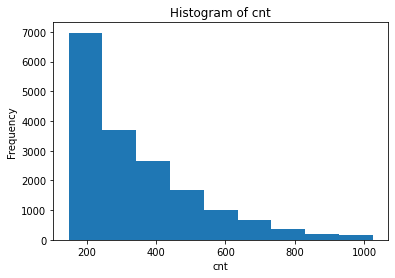

breaks,counts,mids_true,mids,widths
98.6,nan,nan,nan,nan
196.2,6972,0.5,147.4,97.6
293.8,3705,49.5,245,97.6
391.4,2659,98.5,342.6,97.6
489,1660,147,440.2,97.6
586.6,987,196,537.8,97.6
684.2,663,244.5,635.4,97.6
781.8,369,293.5,733,97.6
879.4,188,342.5,830.6,97.6
977,176,391,928.2,97.6


In [20]:
bike_sharing_data['cnt'].hist(breaks = 10, plot = True)

Converting H2O Frame into Pandas dataframe for plotting with seaborn

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

bike_sharing_data_pd = bike_sharing_data.as_data_frame(use_pandas = True)

sns.barplot(x = bike_sharing_data_pd['season'], y = bike_sharing_data_pd['cnt'], estimator = 'mean')

TypeError: 'str' object is not callable

Correlation matrix obtained for numeric columns. As sum of casual and registered is equal to 'cnt', individually high correlation can be observed. We would drop both columns for model training.Also,atemp would be removed as it is showing high correlation with 'temp'.

In [24]:
bike_sharing_data[numeric_cols].cor()

temp,atemp,hum,windspeed,casual,registered,cnt
1,0.987672,-0.0698814,-0.0231253,0.459616,0.335361,0.404772
0.987672,1,-0.0519177,-0.062336,0.45408,0.332559,0.400929
-0.0698814,-0.0519177,1,-0.290105,-0.347028,-0.273933,-0.322911
-0.0231253,-0.062336,-0.290105,1,0.0902868,0.0823208,0.0932338
0.459616,0.45408,-0.347028,0.0902868,1,0.506618,0.694564
0.335361,0.332559,-0.273933,0.0823208,0.506618,1,0.972151
0.404772,0.400929,-0.322911,0.0932338,0.694564,0.972151,1


<AxesSubplot:xlabel='temp', ylabel='cnt'>

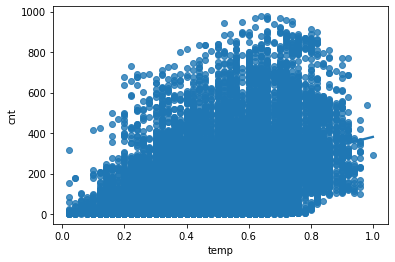

In [25]:
sns.regplot(x = 'temp', y = 'cnt', data = bike_sharing_data_pd)

<AxesSubplot:xlabel='hum', ylabel='cnt'>

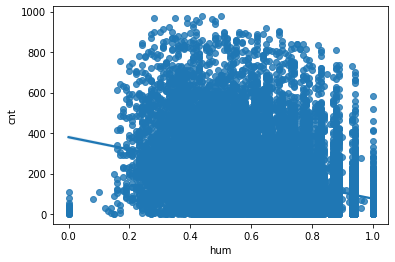

In [26]:
sns.regplot(x = 'hum', y = 'cnt', data = bike_sharing_data_pd)

Data is split into  training and testing sets

In [37]:
bike_sharing_data_train, bike_sharing_data_test = bike_sharing_data.split_frame(ratios = [0.7], seed = 1234)

bike_sharing_data_val, bike_sharing_data_test = bike_sharing_data_test.split_frame(ratios = [0.7], seed = 1234)

Predictors and response vars are defined

In [38]:
predictors = [
    'season', 
    'yr', 
    'mnth', 
    'hr', 
    'holiday', 
    'weekday', 
    'workingday', 
    'weathersit', 
    'temp', 
    'hum', 
    'windspeed',
 ]

response = 'cnt'

Fitting a linear regression model with training data

In [39]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

lin_reg_model = H2OGeneralizedLinearEstimator()
lin_reg_model.train(x = predictors, y = response,
                    training_frame = bike_sharing_data_train,
                    validation_frame = bike_sharing_data_val)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677318363097_2


GLM Model: summary
    family    link      regularization                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  -------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 0.1451 )  60                            55                             1                       py_51_sid_a0f1

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 15766.015274142666
RMSE: 125.56279414756055
MAE: 93.16280486787988
RMSLE: NaN
Mean Residual Deviance: 15766.015274142666
R^2: 0.5229676843749952
Null degrees of freedom: 12221
Residual degrees of freedom: 12166
Null deviance: 403939591.44698083
Residual deviance: 192692238.68057168
AIC: 152931.6430081532

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 15512.464177183587
RMSE: 124.54904326081187
MAE: 91.95574234693764
RMSLE: NaN
Mean Residual Deviance: 15512.464177183587
R^2: 0.5349515678945747
Null degrees of freedom: 3618
Residual degrees of freedom: 3563
Null deviance: 120720405.77764492
Residual deviance: 56139607.8572274
AIC: 45305.452519422746

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae       training_r2         validation_rmse     validation_deviance    validation_mae     validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  -----------------  ------------------  ------------------  ---------------------  -----------------  ------------------
    2023-02-25 15:30:22  0.000 sec   0             403939591.44698083         33050.203849368416
    2023-02-25 15:30:22  0.059 sec   1                                                            125.56279414756055  15766.015274142666   93.16280486787988  0.5229676843749952  124.54904326081187  15512.464177183587     91.95574234693764  0.5349515678945747

Variable Importances: 
variable      relative_importance    scaled_importance      percentage
------------  ---------------------  ---------------------  ----------------------
hr.17         80.51166534423828      1.0                    0.07399885154799227
hr.8          79.31263732910156      0.9851074001511444     0.07289681626261314
hr.18         75.67184448242188      0.9398867127996532     0.06955053733239197
temp          65.6142578125          0.8149658503765579     0.060306536978698186
hr.4          50.543575286865234     0.6277795282305922     0.04645496411440422
hr.3          49.74856948852539      0.6179051107167985     0.0457242685586781
hr.2          47.49222183227539      0.5898800084337606     0.04365044317521828
hr.1          47.15589141845703      0.5857025962242338     0.04334131946927073
hr.5          45.70549774169922      0.5676878939999479     0.042008252193694515
hum           39.10945129394531      0.4857613008838865     0.03594577839186632
---           ---                    ---                    ---
weekday.3     0.8849637508392334     0.010991745693688658   0.0008133765578405502
mnth.4        0.4284004271030426     0.005320973367913331   0.000393745918343039
mnth.8        0.25833165645599365    0.0032086239348231398  0.00023743448622631232
hr.11         0.19179081916809082    0.002382149448133557   0.00017627632337756675
weekday.2     0.006274282466620207   7.793010416308844e-05  5.7667382090839556e-06
hr.14         0.0                    0.0                    0.0
weekday.4     0.0                    0.0                    0.0
weekday.5     0.0                    0.0                    0.0
season.1      0.0                    0.0             

R square and rmse values on training data can be obtained by following way

In [40]:
lin_reg_model.r2()

0.5229676843749952

In [41]:
lin_reg_model.rmse()

125.56279414756055

R square and rmse values on validation

In [45]:
lin_reg_model.r2(valid = True)

0.5349515678945747

In [46]:
lin_reg_model.rmse(valid = True)

124.54904326081187

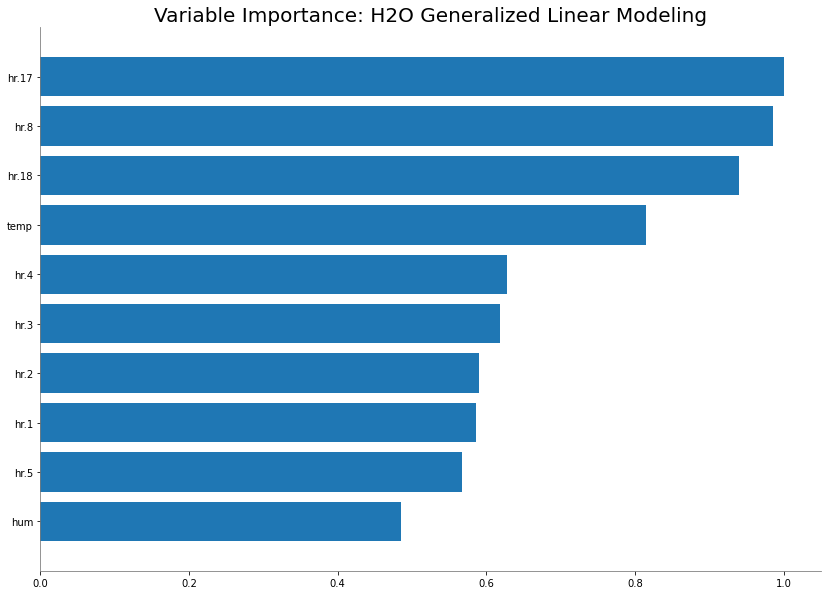

<Figure size 432x288 with 0 Axes>

In [42]:
lin_reg_model.varimp_plot()

Generating predictions on a test set (if necessary)

In [43]:
pred = lin_reg_model.predict(bike_sharing_data_test)

pred

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
-24.157
115.891
32.3935
77.1359
174.892
48.1841
24.2258
84.8016
67.3628
87.5572


In [44]:
perf = lin_reg_model.model_performance(bike_sharing_data_test)

perf

ModelMetricsRegressionGLM: glm
** Reported on test data. **

MSE: 14661.719859105275
RMSE: 121.08558898194812
MAE: 92.69985702562586
RMSLE: NaN
Mean Residual Deviance: 14661.719859105275
R^2: 0.521258292271102
Null degrees of freedom: 1537
Residual degrees of freedom: 1482
Null deviance: 47102448.82118666
Residual deviance: 22549725.143303912
AIC: 19232.68167647692

Building  and training the GradientBoostingEstimator model. Note that we are applying Cross Validation method

In [47]:
from h2o.estimators import H2OGradientBoostingEstimator

gbm_model = H2OGradientBoostingEstimator(nfolds = 5,
                                         seed = 1111,
                                         keep_cross_validation_predictions = True)

gbm_model.train(x = predictors, y = response, training_frame = bike_sharing_data_train)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1677318363097_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          22149                  5            5            5             20            32            30.58

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2180.964404235176
RMSE: 46.70079661242596
MAE: 30.390370561780156
RMSLE: NaN
Mean Residual Deviance: 2180.964404235176

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2634.2005136024445
RMSE: 51.32446311070818
MAE: 32.847203547921616
RMSLE: NaN
Mean Residual Deviance: 2634.2005136024445

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     32.8563   0.435201    32.5158       33.1295       32.3903       32.8005       33.4452
mean_residual_deviance  2636.67   115.374     2547.64       2690.35       2508.93       2638.17       2798.28
mse                     2636.67   115.374     2547.64       2690.35       2508.93       2638.17       2798.28
r2                      0.920075  0.00488022  0.921634      0.92185       0.9251        0.919736      0.912055
residual_deviance       2636.67   115.374     2547.64       2690.35       2508.93       2638.17       2798.28
rmse                    51.3387   1.12068     50.4741       51.8685       50.0892       51.3631       52.8987
rmsle                   nan       0           nan           nan           nan           nan           nan

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2023-02-25 15:32:02  11.753 sec  0.0                181.7971502784585   142.08573612839285  33050.20384936842
     2023-02-25 15:32:02  11.846 sec  1.0                167.99132991320775  131.1514130075636   28221.086926008207
     2023-02-25 15:32:02  11.936 sec  2.0                155.95998373008132  121.48776595812151  24323.51652508723
     2023-02-25 15:32:02  12.028 sec  3.0                145.53646755119837  113.1185207613516   21180.863387281017
     2023-02-25 15:32:03  12.110 sec  4.0                135.90371979518508  105.4768840494532   18469.821054168184
     2023-02-25 15:32:03  12.198 sec  5.0                127.65968514389382  98.86689443062339   16296.995211038107
     2023-02-25 15:32:03  12.245 sec  6.0                120.41342361784095  92.98332951139494   14499.392587369615
     2023-02-25 15:32:03  12.276 sec  7.0                113.5796950077752   87.33082741806187   12900.347118059235
     2023-02-25 15:32:03  12.311 sec  8.0                107.95776860430158  82.44211247587259   11654.879802019925
     2023-02-25 15:32:03  12.343 sec  9.0                102.92214127269993  78.368266853953     10592.967164157602
---  ---                  ---         ---                ---                 ---                 ---
     2023-02-25 15:32:04  13.587 sec  41.0               49.26047255367483   32.21359939636875   2426.594156211351
     2023-02-25 15:32:04  13.623 sec  42.0               48.64539480865312   31.764601463677838  2366.3744360897363
     2023-02-25 15:32:04  13.664 sec  43.0               48.404156991197745  31.59396001409707   2342.9624140285173
     2023-02-25 15:32:04  13.706 sec  44.0               48.14340502852177   31.41663185786989   2317.787447740295
     2023-0

If we compare Gradient boosting model and Linear regression, the performance of GBM model is far better.

In [48]:
perf = gbm_model.model_performance()

perf

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2180.964404235176
RMSE: 46.70079661242596
MAE: 30.390370561780156
RMSLE: NaN
Mean Residual Deviance: 2180.964404235176

R square and rmse values for training data can be obtained 

In [52]:
gbm_model.r2()

0.93401056120031

In [53]:
gbm_model.rmse()

46.70079661242596

Generating predictions on a test set (if necessary)

In [54]:
pred = gbm_model.predict(bike_sharing_data_test)

pred

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
27.2309
182.397
46.8281
103.139
98.6908
6.79168
32.5141
109.753
49.0245
60.4131


Metrics on cross validation data can be obtained this way

In [55]:
gbm_model.r2(xval = True)

0.9202969964842507

In [56]:
gbm_model.rmse(xval = True)

51.32446311070818

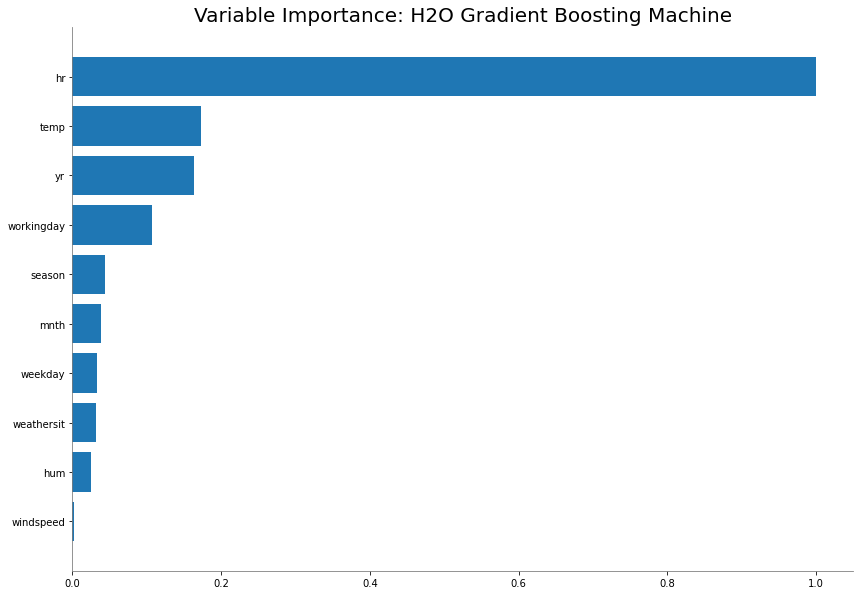

<Figure size 432x288 with 0 Axes>

In [57]:
gbm_model.varimp_plot()